<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/IMDB_Review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Importing all the libraries, Keras, Matplotlib, Numpy 
import keras
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import models,layers
import numpy as np
import matplotlib.pyplot as plt


In [0]:
##!pip install numpy==1.16.1

In [0]:
##Train and test split
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
print(train_data.shape, test_data.shape,len(train_labels),len(test_labels))

(25000,) (25000,) 25000 25000


In [5]:
len(train_data)

25000

In [6]:
train_labels[0]

1

In [7]:
##The num_words ensures that we dont get any word which has index greater than 10,000
max([max(sequence) for sequence in train_data])

9999

In [8]:
max([len(sequence) for sequence in train_data])

2494

In [9]:
len(train_data[0])

218

In [10]:
####Decoding the word index format. Word index is a dictionary having a numeric representation for each word. We just reverse the dictionary and refer it back
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
word_index['the']

1

In [13]:
reverse_word_index[1]

'the'

In [14]:
reverse_word_index.get(1,'?')

'the'

In [0]:
##Here we have varied number of words in each review, We need to standardize this by creating a vectorized sequence
### First we create zero array of dimension (25000,10000) - 25k reviews and 10k words
## Then we set the words which are present as 1.


def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [0]:
X_train = vectorize_sequences(train_data)

In [0]:
X_test = vectorize_sequences(test_data)

In [0]:
y_train = train_labels.astype('float32')

In [0]:
y_test = test_labels.astype('float32')

In [20]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [73]:
X_train[0][:15]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [70]:
set(sorted(train_data[0]))

{1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 25,
 26,
 28,
 30,
 32,
 33,
 35,
 36,
 38,
 39,
 43,
 46,
 48,
 50,
 51,
 52,
 56,
 62,
 65,
 66,
 71,
 76,
 77,
 82,
 87,
 88,
 92,
 98,
 100,
 103,
 104,
 106,
 107,
 112,
 113,
 117,
 124,
 130,
 134,
 135,
 141,
 144,
 147,
 150,
 167,
 172,
 173,
 178,
 192,
 194,
 215,
 224,
 226,
 256,
 283,
 284,
 297,
 316,
 317,
 336,
 381,
 385,
 386,
 400,
 407,
 447,
 458,
 469,
 476,
 480,
 515,
 530,
 546,
 619,
 626,
 670,
 723,
 838,
 973,
 1029,
 1111,
 1247,
 1334,
 1385,
 1415,
 1622,
 1920,
 2025,
 2071,
 2223,
 3766,
 3785,
 3941,
 4468,
 4472,
 4536,
 4613,
 5244,
 5345,
 5535,
 5952,
 7486}

In [21]:
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
##Creating validation data sets 
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
x_val.shape,partial_x_train.shape,y_val.shape,partial_y_train.shape

((10000, 10000), (15000, 10000), (10000,), (15000,))

In [26]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.5085 - acc: 0.7821 - val_loss: 0.3799 - val_acc: 0.8692
Epoch 2/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.2180 - acc: 0.9281 - val_loss: 0.3088 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1751 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.1151 - acc: 0.9652 - val_loss: 0.3154 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 3s 173us/step - 

In [0]:
accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = list(range(1,21))

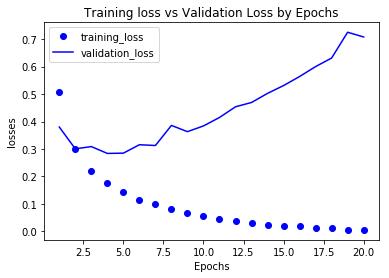

In [44]:
###plotting the training and validation accuracy and losses on matplot lib
plt.plot(epochs,loss,'bo',label = 'training_loss')
plt.plot(epochs,val_loss,'b',label = 'validation_loss')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()
plt.title('Training loss vs Validation Loss by Epochs')
plt.show()

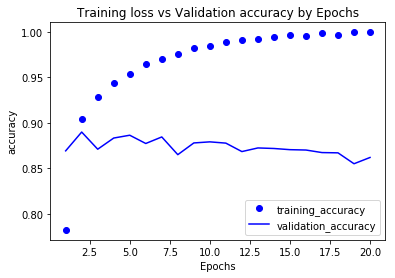

In [45]:
###plotting the training and validation accuracy and losses on matplot lib
plt.plot(epochs,accuracy,'bo',label = 'training_accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training loss vs Validation accuracy by Epochs')
plt.show()

In [48]:
model.fit(X_train,y_train,epochs=3,batch_size= 512)
results = model.evaluate(X_test,y_test)

Epoch 1/3
25000/25000 [==============================] - 3s 115us/step - loss: 0.0713 - acc: 0.9776
Epoch 2/3
25000/25000 [==============================] - 3s 129us/step - loss: 0.0562 - acc: 0.9834
Epoch 3/3
25000/25000 [==============================] - 2s 86us/step


In [49]:
results

[0.6630332601356507, 0.85492]

In [0]:
output = model.predict(X_test)

In [0]:
func = lambda x : 1 if x >= 0.5 else 0


In [0]:
output_0_1 = np.array(list(map(func,output) ))

In [61]:
output_0_1

array([0, 1, 1, ..., 0, 0, 1])